<a href="https://colab.research.google.com/github/SACHINSIROHI47/DataScience_with_Python_Programming_Project/blob/main/Heart%20Attack%20Prediction%20Health%20Care%20Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Health Care Project- Heart Attack Prediction**
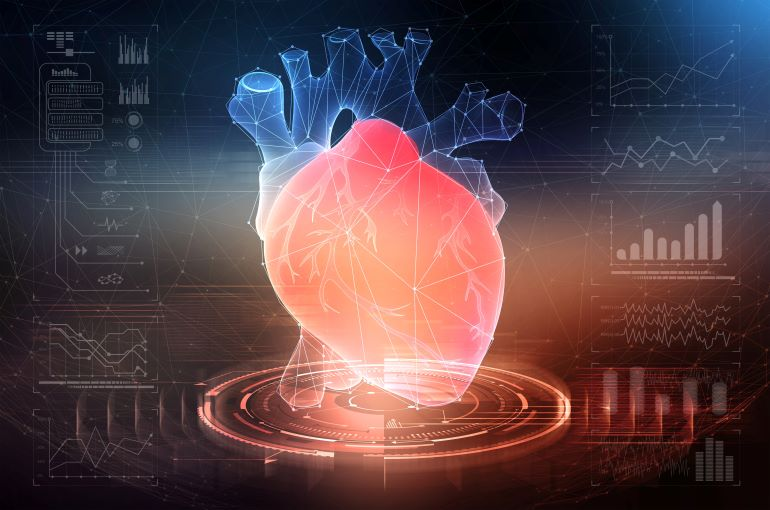


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# prompt: basic example of plotly
import plotly.express as px

df = px.data.iris()
fig = px.scatter(df, x="sepal_length", y="sepal_width", color="species")
fig.show()


In [ ]:
df=pd.read_csv('heart_attack_prediction_dataset.csv')
df.head()


,Patient ID,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,...,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk
0,BMW7812,67,Male,208,158/88,72,0,0,1,0,...,6.615001,261404,31.251233,286,0,6,Argentina,South America,Southern Hemisphere,0
1,CZE1114,21,Male,389,165/93,98,1,1,1,1,...,4.963459,285768,27.194973,235,1,7,Canada,North America,Northern Hemisphere,0
2,BNI9906,21,Female,324,174/99,72,1,0,0,0,...,9.463426,235282,28.176571,587,4,4,France,Europe,Northern Hemisphere,0
3,JLN3497,84,Male,383,163/100,73,1,1,1,0,...,7.648981,125640,36.464704,378,3,4,Canada,North America,Northern Hemisphere,0
4,GFO8847,66,Male,318,91/88,93,1,1,1,1,...,1.514821,160555,21.809144,231,1,5,Thailand,Asia,Northern Hemisphere,0


In [ ]:
df.shape

(8763, 26)

In [ ]:
df.columns

Index(['Patient ID', 'Age', 'Sex', 'Cholesterol', 'Blood Pressure',
       'Heart Rate', 'Diabetes', 'Family History', 'Smoking', 'Obesity',
       'Alcohol Consumption', 'Exercise Hours Per Week', 'Diet',
       'Previous Heart Problems', 'Medication Use', 'Stress Level',
       'Sedentary Hours Per Day', 'Income', 'BMI', 'Triglycerides',
       'Physical Activity Days Per Week', 'Sleep Hours Per Day', 'Country',
       'Continent', 'Hemisphere', 'Heart Attack Risk'],
      dtype='object')

In [ ]:
#insert the New Cell -ctlr+M+B
#ctrl+Enter for running

#inplace true for save the changes permanently or overwrite
df.drop_duplicates(inplace=True)
df.shape

(8763, 26)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 26 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Patient ID                       8763 non-null   object 
 1   Age                              8763 non-null   int64  
 2   Sex                              8763 non-null   object 
 3   Cholesterol                      8763 non-null   int64  
 4   Blood Pressure                   8763 non-null   object 
 5   Heart Rate                       8763 non-null   int64  
 6   Diabetes                         8763 non-null   int64  
 7   Family History                   8763 non-null   int64  
 8   Smoking                          8763 non-null   int64  
 9   Obesity                          8763 non-null   int64  
 10  Alcohol Consumption              8763 non-null   int64  
 11  Exercise Hours Per Week          8763 non-null   float64
 12  Diet                

In [ ]:
columns_to_drop=['Hemisphere','Patient ID','Continent']
df.drop(columns=columns_to_drop,inplace=True)
df.head()


,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,...,Medication Use,Stress Level,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Heart Attack Risk
0,67,Male,208,158/88,72,0,0,1,0,0,...,0,9,6.615001,261404,31.251233,286,0,6,Argentina,0
1,21,Male,389,165/93,98,1,1,1,1,1,...,0,1,4.963459,285768,27.194973,235,1,7,Canada,0
2,21,Female,324,174/99,72,1,0,0,0,0,...,1,9,9.463426,235282,28.176571,587,4,4,France,0
3,84,Male,383,163/100,73,1,1,1,0,1,...,0,9,7.648981,125640,36.464704,378,3,4,Canada,0
4,66,Male,318,91/88,93,1,1,1,1,0,...,0,6,1.514821,160555,21.809144,231,1,5,Thailand,0


In [ ]:
df['Age'].unique()

array([67, 21, 84, 66, 54, 90, 20, 43, 73, 71, 77, 60, 88, 69, 38, 50, 45,
       36, 48, 40, 79, 63, 27, 25, 86, 42, 52, 29, 30, 47, 44, 33, 51, 70,
       85, 31, 56, 24, 74, 72, 55, 26, 53, 46, 57, 22, 35, 39, 80, 65, 83,
       82, 28, 19, 75, 18, 34, 37, 89, 32, 49, 23, 59, 62, 64, 61, 76, 41,
       87, 81, 58, 78, 68])

In [ ]:
df['Age'].isnull().sum()

0

In [ ]:
df['Income'].unique()

array([261404, 285768, 235282, ...,  36998, 209943, 247338])

In [ ]:
df['Income'].isnull().sum()

0

**Male- 1**

**Female- 0**

In [ ]:
df['Sex'].unique()

array(['Male', 'Female'], dtype=object)

In [ ]:
df=pd.get_dummies(df,columns=['Sex'],drop_first=True)
df.rename(columns={'Sex_Male':'Gender'},inplace=True)
df.head()

,Age,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,...,Stress Level,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Heart Attack Risk,Gender
0,67,208,158/88,72,0,0,1,0,0,4.168189,...,9,6.615001,261404,31.251233,286,0,6,Argentina,0,True
1,21,389,165/93,98,1,1,1,1,1,1.813242,...,1,4.963459,285768,27.194973,235,1,7,Canada,0,True
2,21,324,174/99,72,1,0,0,0,0,2.078353,...,9,9.463426,235282,28.176571,587,4,4,France,0,False
3,84,383,163/100,73,1,1,1,0,1,9.828130,...,9,7.648981,125640,36.464704,378,3,4,Canada,0,True
4,66,318,91/88,93,1,1,1,1,0,5.804299,...,6,1.514821,160555,21.809144,231,1,5,Thailand,0,True


In [ ]:
df.dtypes

,0
Age,int64
Cholesterol,int64
Blood Pressure,object
Heart Rate,int64
Diabetes,int64
Family History,int64
Smoking,int64
Obesity,int64
Alcohol Consumption,int64
Exercise Hours Per Week,float64


In [ ]:
df['Gender']=df['Gender'].astype(int)
df.dtypes

,0
Age,int64
Cholesterol,int64
Blood Pressure,object
Heart Rate,int64
Diabetes,int64
Family History,int64
Smoking,int64
Obesity,int64
Alcohol Consumption,int64
Exercise Hours Per Week,float64


In [ ]:
df.head()

,Age,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,...,Stress Level,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Heart Attack Risk,Gender
0,67,208,158/88,72,0,0,1,0,0,4.168189,...,9,6.615001,261404,31.251233,286,0,6,Argentina,0,1
1,21,389,165/93,98,1,1,1,1,1,1.813242,...,1,4.963459,285768,27.194973,235,1,7,Canada,0,1
2,21,324,174/99,72,1,0,0,0,0,2.078353,...,9,9.463426,235282,28.176571,587,4,4,France,0,0
3,84,383,163/100,73,1,1,1,0,1,9.828130,...,9,7.648981,125640,36.464704,378,3,4,Canada,0,1
4,66,318,91/88,93,1,1,1,1,0,5.804299,...,6,1.514821,160555,21.809144,231,1,5,Thailand,0,1


In [ ]:
df['Cholesterol'].unique()

array([208, 389, 324, 383, 318, 297, 358, 220, 145, 248, 373, 374, 228,
       259, 122, 379, 166, 303, 340, 294, 359, 202, 133, 159, 271, 273,
       328, 154, 135, 197, 321, 375, 360, 263, 201, 347, 129, 229, 251,
       121, 190, 185, 279, 336, 192, 180, 203, 368, 222, 243, 218, 120,
       285, 377, 369, 311, 139, 266, 153, 339, 329, 333, 398, 124, 183,
       163, 362, 390, 200, 396, 255, 209, 247, 250, 227, 246, 223, 330,
       195, 194, 178, 155, 240, 237, 216, 276, 224, 326, 198, 301, 314,
       304, 334, 213, 254, 230, 316, 277, 388, 206, 384, 205, 261, 308,
       338, 382, 291, 168, 171, 378, 253, 245, 226, 281, 123, 173, 231,
       234, 268, 306, 186, 293, 161, 380, 239, 149, 320, 219, 335, 265,
       126, 307, 270, 225, 193, 148, 296, 136, 364, 353, 252, 232, 387,
       299, 357, 214, 370, 345, 351, 344, 152, 150, 131, 272, 302, 337,
       170, 356, 274, 188, 125, 138, 376, 181, 184, 275, 394, 128, 217,
       399, 283, 289, 284, 327, 262, 212, 350, 385, 162, 141, 36

In [ ]:
#Dummy Example
msg="Hello/Student"
msg.split('/')

['Hello', 'Student']

In [ ]:
df['Blood Pressure'].unique()

array(['158/88', '165/93', '174/99', ..., '137/94', '94/76', '119/67'],
      dtype=object)

In [ ]:
def blood_pressure1(val):
  val=str(val)
  val=val.split('/')
  return int(val[0])

def blood_pressure2(val):
  val=str(val)
  val=val.split('/')
  return int(val[1])

df['Systolic_pressure']=df['Blood Pressure'].apply(blood_pressure1)
df['Diastolic_pressure']=df['Blood Pressure'].apply(blood_pressure2)
df.head()

,Age,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,...,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Heart Attack Risk,Gender,Systolic_pressure,Diastolic_pressure
0,67,208,158/88,72,0,0,1,0,0,4.168189,...,261404,31.251233,286,0,6,Argentina,0,1,158,88
1,21,389,165/93,98,1,1,1,1,1,1.813242,...,285768,27.194973,235,1,7,Canada,0,1,165,93
2,21,324,174/99,72,1,0,0,0,0,2.078353,...,235282,28.176571,587,4,4,France,0,0,174,99
3,84,383,163/100,73,1,1,1,0,1,9.828130,...,125640,36.464704,378,3,4,Canada,0,1,163,100
4,66,318,91/88,93,1,1,1,1,0,5.804299,...,160555,21.809144,231,1,5,Thailand,0,1,91,88


In [ ]:
df.drop(['Blood Pressure'],axis=1,inplace=True)
df.head()

,Age,Cholesterol,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,Diet,...,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Heart Attack Risk,Gender,Systolic_pressure,Diastolic_pressure
0,67,208,72,0,0,1,0,0,4.168189,Average,...,261404,31.251233,286,0,6,Argentina,0,1,158,88
1,21,389,98,1,1,1,1,1,1.813242,Unhealthy,...,285768,27.194973,235,1,7,Canada,0,1,165,93
2,21,324,72,1,0,0,0,0,2.078353,Healthy,...,235282,28.176571,587,4,4,France,0,0,174,99
3,84,383,73,1,1,1,0,1,9.828130,Average,...,125640,36.464704,378,3,4,Canada,0,1,163,100
4,66,318,93,1,1,1,1,0,5.804299,Unhealthy,...,160555,21.809144,231,1,5,Thailand,0,1,91,88


In [ ]:
df['Heart Rate'].isnull().sum()

0

In [ ]:
df['Heart Rate'].isna().sum()

0

**Diet Plan Labeling**

1.   Unhealthy- 0
2.   Average - 1
3.   Healthy - 2

In [ ]:
df['Diet'].unique()

array(['Average', 'Unhealthy', 'Healthy'], dtype=object)

In [ ]:
def handle_Diet(value):
  value=str(value)
  if value=='Unhealthy':
    return 0
  elif value=='Average':
    return 1
  elif value=='Healthy':
    return 2
  else:
    return np.nan

df['Diet']=df['Diet'].apply(handle_Diet)
df.head()

,Age,Cholesterol,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,Diet,...,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Heart Attack Risk,Gender,Systolic_pressure,Diastolic_pressure
0,67,208,72,0,0,1,0,0,4.168189,1,...,261404,31.251233,286,0,6,Argentina,0,1,158,88
1,21,389,98,1,1,1,1,1,1.813242,0,...,285768,27.194973,235,1,7,Canada,0,1,165,93
2,21,324,72,1,0,0,0,0,2.078353,2,...,235282,28.176571,587,4,4,France,0,0,174,99
3,84,383,73,1,1,1,0,1,9.828130,1,...,125640,36.464704,378,3,4,Canada,0,1,163,100
4,66,318,93,1,1,1,1,0,5.804299,0,...,160555,21.809144,231,1,5,Thailand,0,1,91,88


In [ ]:
df['Diet'].unique()

array([1, 0, 2])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 24 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Age                              8763 non-null   int64  
 1   Cholesterol                      8763 non-null   int64  
 2   Heart Rate                       8763 non-null   int64  
 3   Diabetes                         8763 non-null   int64  
 4   Family History                   8763 non-null   int64  
 5   Smoking                          8763 non-null   int64  
 6   Obesity                          8763 non-null   int64  
 7   Alcohol Consumption              8763 non-null   int64  
 8   Exercise Hours Per Week          8763 non-null   float64
 9   Diet                             8763 non-null   int64  
 10  Previous Heart Problems          8763 non-null   int64  
 11  Medication Use                   8763 non-null   int64  
 12  Stress Level        

In [ ]:
df['Medication Use'].unique()

array([0, 1])

In [ ]:
df['Stress Level'].unique()

array([ 9,  1,  6,  2,  7,  4,  5,  8, 10,  3])

In [ ]:
df['Triglycerides'].unique()

array([286, 235, 587, 378, 231, 795, 284, 370, 790, 232, 469, 523, 590,
       506, 635, 773,  68, 402, 517, 247, 747, 360, 358, 526, 605, 667,
       316, 551, 482, 718, 297, 661, 558, 209, 586, 743, 411, 785, 697,
       519, 595, 452, 158, 679, 675, 792, 584, 366, 741, 474,  92, 410,
       398, 493, 614, 682, 106, 216, 408, 628, 481,  67,  82, 305, 164,
       211, 511, 766, 547, 327, 367, 681, 131,  42, 692, 664, 543, 689,
       569, 458, 683, 779, 136, 643, 653,  55, 275, 314, 760, 404, 576,
       690, 648, 385, 255, 468, 784, 509, 205, 109, 530, 654, 331, 485,
       250, 113, 377, 180, 229, 602, 285, 471, 554, 344, 416, 445, 709,
       426, 528, 388, 441, 306, 749, 347, 341, 451, 356, 336, 455, 223,
       262, 239, 555, 363, 489, 788, 121, 553, 617, 174, 167, 563, 665,
        65, 657, 237, 141, 767, 292, 214, 221, 447, 634, 460, 711,  97,
       267, 695, 717, 383, 332, 449, 701, 524, 549,  31, 276, 744, 128,
        52, 394,  54, 739, 407, 751, 436, 473, 218, 129, 579, 49

In [ ]:
Triglicrides=df['Triglycerides'].value_counts(ascending=True)
Triglicrides

,count
Triglycerides,
130,2
295,3
213,3
185,3
120,3
...,...
593,22
121,22
507,22


In [ ]:
df['Country'].unique()

array(['Argentina', 'Canada', 'France', 'Thailand', 'Germany', 'Japan',
       'Brazil', 'South Africa', 'United States', 'Vietnam', 'China',
       'Italy', 'Spain', 'India', 'Nigeria', 'New Zealand', 'South Korea',
       'Australia', 'Colombia', 'United Kingdom'], dtype=object)

In [ ]:
df['Heart Attack Risk'].unique()

array([0, 1])

**Data Visualization**

Data Encoder using by Sklearn

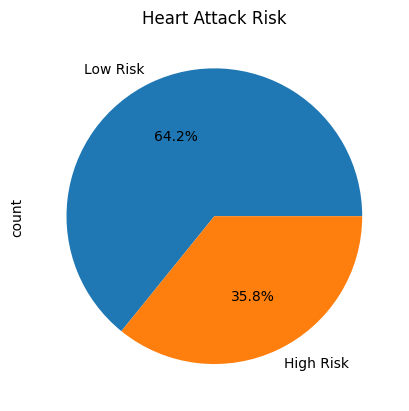

In [ ]:
df['Heart Attack Risk'].value_counts().plot.pie(autopct='%1.1f%%',labels=['Low Risk','High Risk'])
plt.title('Heart Attack Risk')
plt.show()

In [ ]:
df.describe()

,Age,Cholesterol,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,Diet,...,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Heart Attack Risk,Gender,Systolic_pressure,Diastolic_pressure
count,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,...,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000
mean,53.707977,259.877211,75.021682,0.652288,0.492982,0.896839,0.501426,0.598083,10.014284,1.007874,...,5.993690,158263.181901,28.891446,417.677051,3.489672,7.023508,0.358211,0.697364,135.075659,85.156111
std,21.249509,80.863276,20.550948,0.476271,0.499979,0.304186,0.500026,0.490313,5.783745,0.817134,...,3.466359,80575.190806,6.319181,223.748137,2.282687,1.988473,0.479502,0.459425,26.349976,14.676565
min,18.000000,120.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.002442,0.000000,...,0.001263,20062.000000,18.002337,30.000000,0.000000,4.000000,0.000000,0.000000,90.000000,60.000000
25%,35.000000,192.000000,57.000000,0.000000,0.000000,1.000000,0.000000,0.000000,4.981579,0.000000,...,2.998794,88310.000000,23.422985,225.500000,2.000000,5.000000,0.000000,0.000000,112.000000,72.000000
50%,54.000000,259.000000,75.000000,1.000000,0.000000,1.000000,1.000000,1.000000,10.069559,1.000000,...,5.933622,157866.000000,28.768999,417.000000,3.000000,7.000000,0.000000,1.000000,135.000000,85.000000
75%,72.000000,330.000000,93.000000,1.000000,1.000000,1.000000,1.000000,1.000000,15.050018,2.000000,...,9.019124,227749.000000,34.324594,612.000000,5.000000,9.000000,1.000000,1.000000,158.000000,98.000000
max,90.000000,400.000000,110.000000,1.000000,1.000000,1.000000,1.000000,1.000000,19.998709,2.000000,...,11.999313,299954.000000,39.997211,800.000000,7.000000,10.000000,1.000000,1.000000,180.000000,110.000000


#**Label Country Values using with Machine Learning Library**

SkLearn

In [ ]:
df['Country'].unique()

array([ 0,  3,  6, 16,  7, 10,  2, 13, 18, 19,  4,  9, 15,  8, 12, 11, 14,
        1,  5, 17])

In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Country']=le.fit_transform(df['Country'])

In [ ]:
df['Country'].unique()

array([ 0,  3,  6, 16,  7, 10,  2, 13, 18, 19,  4,  9, 15,  8, 12, 11, 14,
        1,  5, 17])

**Visualize the HeartAttack by Country**

In [ ]:
countrywise=df[['Country','Heart Attack Risk']]
countrywise.head(2)

,Country,Heart Attack Risk
0,0,0
1,3,0


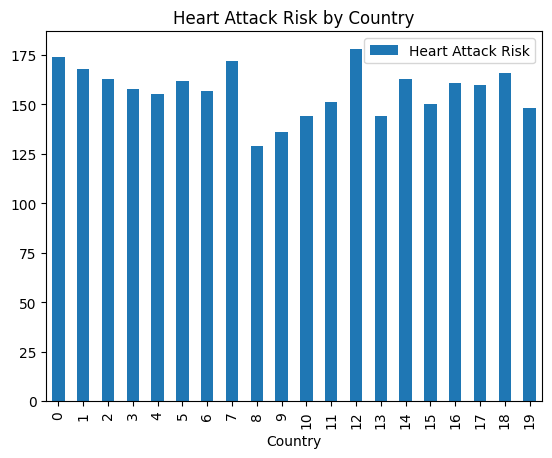

In [ ]:
countrywise.groupby('Country').sum().plot.bar()
plt.title('Heart Attack Risk by Country')
plt.show()

#**Data Correlation using HeatMap Chart**

In [ ]:
df.head()

,Age,Cholesterol,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,Diet,...,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Heart Attack Risk,Gender,Systolic_pressure,Diastolic_pressure
0,67,208,72,0,0,1,0,0,4.168189,1,...,261404,31.251233,286,0,6,0,0,1,158,88
1,21,389,98,1,1,1,1,1,1.813242,0,...,285768,27.194973,235,1,7,3,0,1,165,93
2,21,324,72,1,0,0,0,0,2.078353,2,...,235282,28.176571,587,4,4,6,0,0,174,99
3,84,383,73,1,1,1,0,1,9.828130,1,...,125640,36.464704,378,3,4,3,0,1,163,100
4,66,318,93,1,1,1,1,0,5.804299,0,...,160555,21.809144,231,1,5,16,0,1,91,88


In [ ]:
df.corr()

,Age,Cholesterol,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,Diet,...,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Heart Attack Risk,Gender,Systolic_pressure,Diastolic_pressure
Age,1.000000,-0.009107,-0.003844,-0.014105,0.008353,0.394891,-0.008140,-0.006666,0.001206,-0.013230,...,-0.001733,-0.002612,0.003415,0.001384,-0.002185,0.002567,0.006403,0.020067,0.003070,-0.009826
Cholesterol,-0.009107,1.000000,0.000315,-0.013428,-0.021608,0.016342,-0.014843,-0.007261,0.021517,-0.010765,...,0.000007,0.017292,-0.005454,0.016056,0.004456,0.012962,0.019340,0.007614,0.000133,0.002083
Heart Rate,-0.003844,0.000315,1.000000,0.006764,-0.013470,-0.012331,0.012725,0.003459,0.008276,-0.003014,...,0.004873,0.005299,0.012244,0.000834,0.001811,-0.016436,-0.004251,-0.010921,0.008482,-0.018113
Diabetes,-0.014105,-0.013428,0.006764,1.000000,-0.013844,0.000527,0.012866,0.005551,-0.007014,0.006156,...,-0.000759,-0.002852,0.010431,-0.002411,-0.012457,0.011031,0.017225,0.003582,-0.005306,-0.000512
Family History,0.008353,-0.021608,-0.013470,-0.013844,1.000000,0.011748,-0.001444,0.012701,-0.006378,-0.001401,...,-0.000401,-0.011492,-0.001904,0.009561,-0.011199,-0.003194,-0.001652,0.002180,-0.009762,0.017818
Smoking,0.394891,0.016342,-0.012331,0.000527,0.011748,1.000000,0.003969,0.012754,-0.000150,0.006023,...,0.003096,0.007670,0.004650,-0.006465,-0.005424,0.021095,-0.004051,0.514837,-0.009534,-0.012293
Obesity,-0.008140,-0.014843,0.012725,0.012866,-0.001444,0.003969,1.000000,-0.024195,0.002099,0.003743,...,-0.003870,-0.006058,0.001467,0.005337,-0.005314,-0.009631,-0.013318,0.002376,-0.001918,-0.020574
Alcohol Consumption,-0.006666,-0.007261,0.003459,0.005551,0.012701,0.012754,-0.024195,1.000000,-0.008514,0.005336,...,-0.022396,0.010562,0.006169,0.001593,-0.000843,0.013029,-0.013778,0.002085,0.010764,-0.007282
Exercise Hours Per Week,0.001206,0.021517,0.008276,-0.007014,-0.006378,-0.000150,0.002099,-0.008514,1.000000,0.007667,...,-0.023414,0.003777,0.001717,0.007725,-0.001245,0.005799,0.011133,-0.006976,-0.009506,-0.003469
Diet,-0.013230,-0.010765,-0.003014,0.006156,-0.001401,0.006023,0.003743,0.005336,0.007667,1.000000,...,-0.000659,0.011755,-0.013660,-0.013265,-0.014513,-0.005703,0.005908,0.005740,0.013648,0.005636


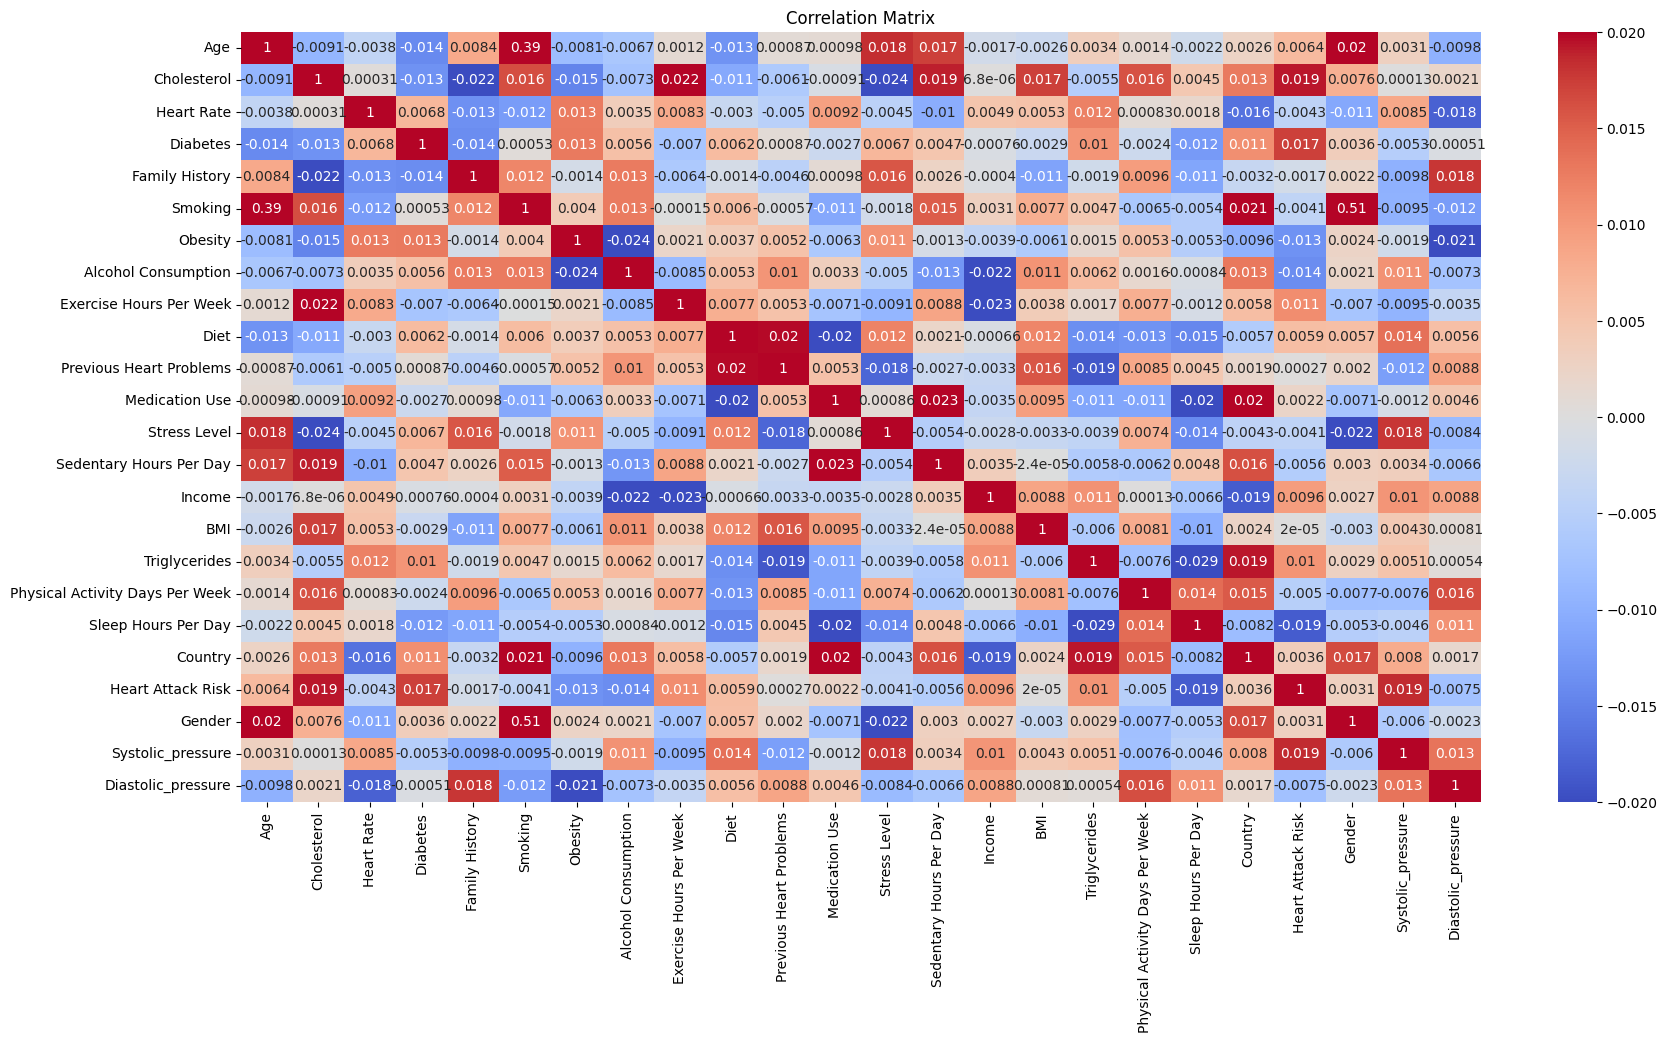

In [ ]:
plt.figure(figsize=(20,10))  #width X Height
sns.heatmap(df.corr(),annot=True,cmap='coolwarm',vmin=-0.0200,vmax=0.0200)
plt.title('Correlation Matrix')
plt.show()

In [ ]:
df.columns

Index(['Age', 'Cholesterol', 'Heart Rate', 'Diabetes', 'Family History',
       'Smoking', 'Obesity', 'Alcohol Consumption', 'Exercise Hours Per Week',
       'Diet', 'Previous Heart Problems', 'Medication Use', 'Stress Level',
       'Sedentary Hours Per Day', 'Income', 'BMI', 'Triglycerides',
       'Physical Activity Days Per Week', 'Sleep Hours Per Day', 'Country',
       'Heart Attack Risk', 'Gender', 'Systolic_pressure',
       'Diastolic_pressure'],
      dtype='object')

In [ ]:
plotShow=df[['Alcohol Consumption','Stress Level','Diabetes','Family History','Smoking','Medication Use','Country']]
plotShow.head()

,Alcohol Consumption,Stress Level,Diabetes,Family History,Smoking,Medication Use,Country
0,0,9,0,0,1,0,0
1,1,1,1,1,1,0,3
2,0,9,1,0,0,1,6
3,1,9,1,1,1,0,3
4,0,6,1,1,1,0,16


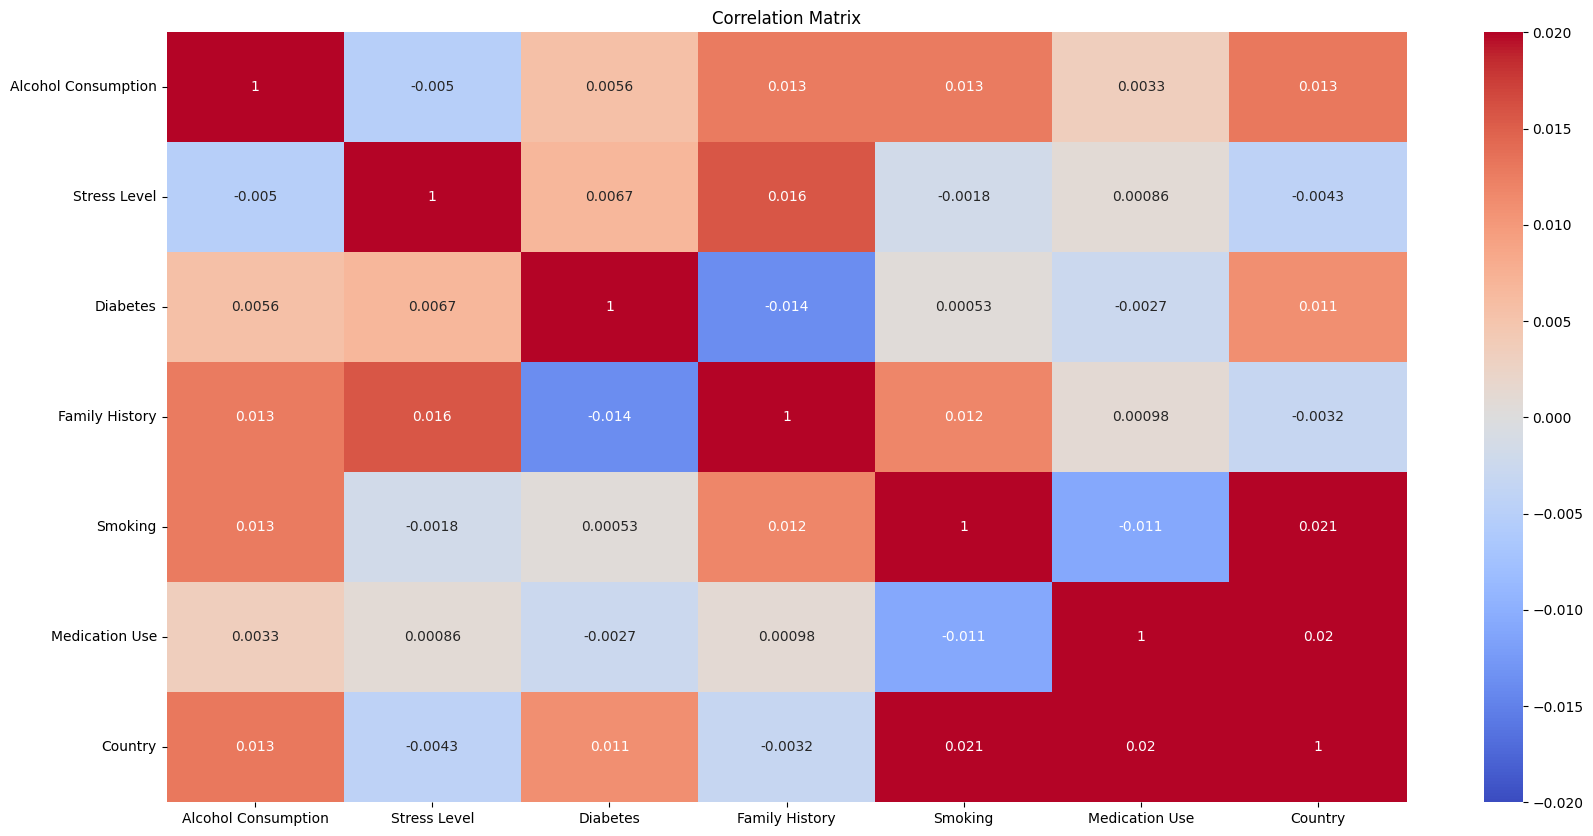

In [ ]:
plt.figure(figsize=(20,10))
sns.heatmap(plotShow.corr(),annot=True,cmap='coolwarm',vmin=-0.0200,vmax=0.0200)
plt.title('Correlation Matrix')
plt.show()